In [1]:
import numpy as np
import sys
sys.path.append("../../")
from src.util import operators
from src.homps import homps
from src.util import noise_generator
from src.util import debye_spectral_density
from src.util import bath_correlation_function

In [22]:
# Parameters for the spin-boson model
epsilon = 2.0
delta = -2.0
# Parameters for the Debye spectral density
beta = 50
T = 1/beta
gamma = 5.0
eta = 0.5
# operators
sigma_x, sigma_z, eye = operators.generate_physical_operators()
L = sigma_z
h = operators.generate_spin_boson_hamiltonian(delta=delta, epsilon=epsilon)
# time window
duration = 5

In [71]:
N_steps = 10000
taus = np.linspace(0, duration, N_steps)[1:]
np.save("data/taus", taus)

In [49]:
J = lambda w : debye_spectral_density.debye_spectral_density(w, eta, gamma)

In [50]:
w_cut = 1000
N = 100000
dw = w_cut/N

In [51]:
alphas_compare = np.array([bath_correlation_function.alpha_sum(tau, J, beta, N, dw) for tau in taus])

In [68]:
np.save("data/alphas_compare", alphas_compare)

In [52]:
alphas_matsubara = []
N_terms_matsubara = [1, 10, 100, 1000]
for N_terms in N_terms_matsubara:
    g, w = debye_spectral_density.get_debye_coefficients(N_terms, T, gamma, eta, mode='matsubara')
    alphas = bath_correlation_function.alpha(taus, g, w)
    alphas_matsubara.append(alphas)

In [72]:
np.save("data/alphas_matsubara", alphas_matsubara)

In [62]:
alphas_pade = []
N_terms_pade = [1, 5, 13, 20]
for N_terms in N_terms_pade:
    g, w = debye_spectral_density.get_debye_coefficients(N_terms, T, gamma, eta, mode='pade')
    alphas = bath_correlation_function.alpha(taus, g, w)
    alphas_pade.append(alphas)

In [70]:
np.save("data/alphas_pade", alphas_pade)

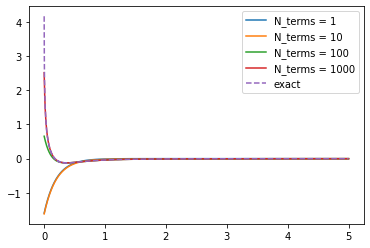

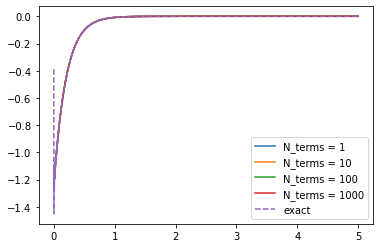

In [63]:
import matplotlib.pyplot as plt

for i, N_terms in enumerate(N_terms_matsubara):
    plt.plot(taus, np.real(alphas_matsubara[i]), label="N_terms = "+str(N_terms))
plt.plot(taus, np.real(alphas_compare), "--", label="exact")
plt.legend()
plt.show()

for i, N_terms in enumerate(N_terms_matsubara):
    plt.plot(taus, np.imag(alphas_matsubara[i]), label="N_terms = "+str(N_terms))
plt.plot(taus, np.imag(alphas_compare), "--", label="exact")
plt.legend()
plt.show()

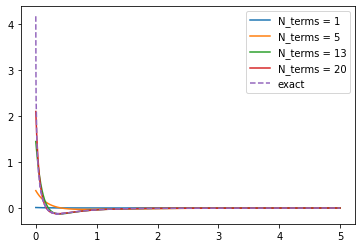

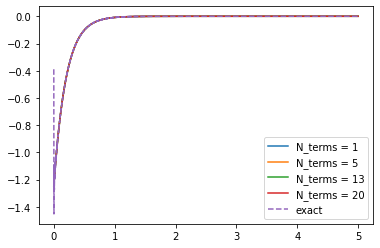

In [67]:
import matplotlib.pyplot as plt

for i, N_terms in enumerate(N_terms_pade):
    plt.plot(taus, np.real(alphas_pade[i]), label="N_terms = "+str(N_terms))
plt.plot(taus, np.real(alphas_compare), "--", label="exact")
plt.legend()
plt.show()

for i, N_terms in enumerate(N_terms_pade):
    plt.plot(taus, np.imag(alphas_pade[i]), label="N_terms = "+str(N_terms))
plt.plot(taus, np.imag(alphas_compare), "--", label="exact")
plt.legend()
plt.show()